In [4]:
#Replication Question

import pandas as pd
import numpy as np

birth = pd.read_csv("Downloads/quarter_birth.csv")
birth.head()

,AGE,AGEQ,v3,EDUC,ENOCENT,ESOCENT,v7,LWKLYWGE,MARRIED,MIDATL,...,QTR320,QTR321,QTR322,QTR323,QTR324,QTR325,QTR326,QTR327,QTR328,QTR329
0,40,40.50,1,11,0,0,13,5.023558,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,41,41.00,1,12,0,0,14,5.061540,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,41.50,1,12,0,0,14,5.378315,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,46,46.25,1,12,0,0,14,5.178639,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46,46.00,1,16,0,0,18,6.378776,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#1 A variable correlated with school and with an effect on wages could be wealth. Wealth could lead to more years 
#in school because one doesn't have to account for the cost and could also lead to you earning more money in the 
#future. This would cause an upward bias because the effect fo school on education would look larger than it 
#actually is. 

In [5]:
#2

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from __future__ import division 

birth['AGESQ'] = birth['AGE'] * birth['AGE']


x = birth[['EDUC', 'MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR28', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]
y = birth['LWKLYWGE']


x_const = sm.add_constant(x)


first_model_results = sm.OLS(y, x_const, missing='drop').fit()


print(first_model_results.summary())

#For every additional year of education, we expect the log of weekly wage to increase by 0.07. Based on what we expect from a wealth confounder, this is likely an overestimate of the effect of education on weekly wage. 

                            OLS Regression Results                            
Dep. Variable:               LWKLYWGE   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3203.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:18:06   Log-Likelihood:            -2.1251e+05
No. Observations:              247199   AIC:                         4.251e+05
Df Residuals:                  247175   BIC:                         4.253e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3258      0.930      3.577      0.0

In [40]:
# First Stage:

from statsmodels.regression.linear_model import OLS

x = birth[['EDUC', 'MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR28', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]
endog_feature = birth['EDUC']
instr_plus_controls = birth[['QTR1', 'QTR2', 'QTR3', 'QTR4','MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR28', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]

instr_plus_controls_plus_constant = sm.add_constant(instr_plus_controls)

first_stage = OLS(endog_feature, instr_plus_controls_plus_constant,missing='drop').fit()

first_stage.summary()

#This model matches the story of Dill and Pickle because the regression coefficient has a lower value for the first quarter, showing more students dropped out of school and have less years of education than students born in later quarters.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EDUC   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     772.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:18:58   Log-Likelihood:            -6.4146e+05
No. Observations:              247199   AIC:                         1.283e+06
Df Residuals:                  247174   BIC:                         1.283e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5470      0.717      2.157      0.031       0.141       2.953
QTR1           0.1854      0.099      1.870      0.062      -0.009       0.380
QTR2           0.3736      0.207      1.808      0.071      -0.031       0.779
QTR3           0.4810      0.207      2.329      0.020       0.076       0.886
QTR4           0.5071      0.207      2.455      0.014       0.102       0.912
MARRIED        0.4061      0.021     19.139      0.000       0.365       0.448
RACE          -2.3174      0.024    -95.803      0.000      -2.365      -2.270
SMSA          -0.5883      0.014    -40.590      0.000      -0.617      -0.560
NEWENG        -0.4111      0.034    -12.178      0.000      -0.477      -0.345
MIDATL        -0.4558      0.023    -19.564      0.000      -0.502      -0.410
WNOCENT       -0.5819      0.031    -19.009      0.000      -0.642      -0.522
WSOCENT       -1.1395      0.029    -39.761      0.000      -1.196      -1.083
SOATL         -1.1050      0.025    -44.180      0.000      -1.154      -1.056
ENOCENT       -0.7391      0.023    -32.272      0.000      -0.784      -0.694
ESOCENT       -1.6531      0.033    -49.715      0.000      -1.718      -1.588
MT            -0.1552      0.038     -4.081      0.000      -0.230      -0.081
YR20          -1.9602      0.959     -2.043      0.041      -3.841      -0.080
YR28          -0.1480      0.045     -3.284      0.001      -0.236      -0.060
YR21          -1.6848      0.832     -2.026      0.043      -3.315      -0.055
YR22          -1.5224      0.709     -2.146      0.032      -2.913      -0.132
YR23          -1.2802      0.593     -2.160      0.031      -2.442      -0.119
YR24          -1.0756      0.481     -2.236      0.025      -2.018      -0.133
YR25          -0.9116      0.375     -2.433      0.015      -1.646      -0.177
YR26          -0.6719      0.274     -2.454      0.014      -1.209      -0.135
YR27          -0.5368      0.178     -3.007      0.003      -0.887      -0.187
YR28          -0.1480      0.045     -3.284      0.001      -0.236      -0.060
AGE            0.3465      0.128      2.716      0.007       0.096       0.596
AGESQ         -0.0021      0.003     -0.812      0.417      -0.007       0.003
==============================================================================
Omnibus:                     1720.984   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.384
Skew:                          -0.157   Prob(JB):                         0.00
Kurtosis:                       3.302   Cond. No.                     2.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-21. This might indicate

(array([2.8000e+01, 2.0500e+02, 5.3900e+02, 1.1660e+03, 2.0770e+03,
        2.6180e+03, 3.2510e+03, 3.8260e+03, 3.3020e+03, 2.6300e+03,
        3.9300e+03, 5.6770e+03, 1.3462e+04, 2.0961e+04, 3.5068e+04,
        4.3032e+04, 4.5181e+04, 3.4177e+04, 1.7306e+04, 8.7630e+03]),
 array([ 7.22893857,  7.51359446,  7.79825035,  8.08290624,  8.36756213,
         8.65221802,  8.93687391,  9.22152979,  9.50618568,  9.79084157,
        10.07549746, 10.36015335, 10.64480924, 10.92946513, 11.21412102,
        11.49877691, 11.7834328 , 12.06808869, 12.35274458, 12.63740047,
        12.92205636]),
 <BarContainer object of 20 artists>)

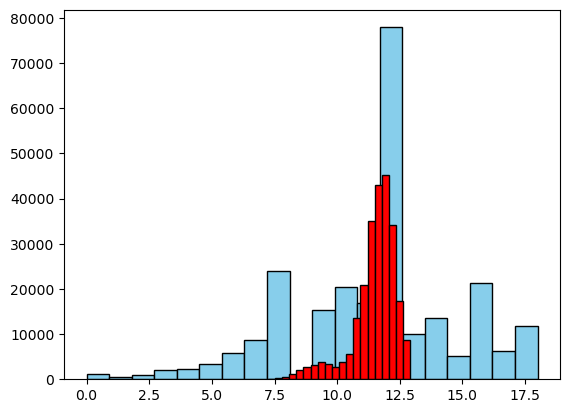

In [30]:
#4.

import seaborn as sns
import matplotlib.pyplot as plt

birth['EDUChat'] = first_stage.fittedvalues

#def print_resids(preds, resids):
    #ax = sns.regplot(x=preds, y=resids)
    #ax.set(xlabel='Predicted values', ylabel='Errors', title='Predicted values vs. Errors')
    #plt.show()

#print_resids(first_stage.predict(instr_plus_controls_plus_constant), first_stage.resid)

#sns.histplot(first_stage.resid);
plt.hist(birth['EDUC'], bins = 20, color='skyblue', edgecolor='black')
plt.hist(birth['EDUChat'], bins = 20, color='red', edgecolor='black')

#The distributions have a similar center, but EDUChat has a much smaller spread. This is not suprising because the projection EDUChat uses less data because it has to use ones that match the IVs. 

In [31]:
#5
proj_features = birth['EDUChat']
outcome = birth['LWKLYWGE']
proj_feature_plus_constant = sm.add_constant(proj_features)


second_stage = OLS(outcome, proj_feature_plus_constant,missing='drop').fit()
second_stage.summary()

#We shouldn't need to control because the instruments and outcomes should not be confounded since quarter of birth should only be connected to weekly wage through education. Including all the controls can increase the variance drastically. However the diferent regression outcome suggest there is a possible confounder that controlling for can preserve endogeniety.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LWKLYWGE   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                 2.281e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:35:13   Log-Likelihood:            -2.3385e+05
No. Observations:              247199   AIC:                         4.677e+05
Df Residuals:                  247197   BIC:                         4.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7046      0.016    166.203      0.000       2.673       2.737
EDUChat        0.2132      0.001    151.036      0.000       0.210       0.216
==============================================================================
Omnibus:                   108895.370   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342528.394
Skew:                          -1.791   Prob(JB):                         0.00
Kurtosis:                      13.840   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#5 with controls

proj_features = birth[['EDUChat', 'MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR28', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]
outcome = birth['LWKLYWGE']
proj_feature_plus_constant = sm.add_constant(proj_features)

second_stage = OLS(outcome, proj_feature_plus_constant,missing='drop').fit()
second_stage.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LWKLYWGE   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1299.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:37:40   Log-Likelihood:            -2.3065e+05
No. Observations:              247199   AIC:                         4.614e+05
Df Residuals:                  247175   BIC:                         4.616e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5659      1.051      3.394      0.001       1.507       5.625
EDUChat        0.0514      0.025      2.061      0.039       0.003       0.100
MARRIED        0.3004      0.011     27.529      0.000       0.279       0.322
RACE          -0.3413      0.058     -5.881      0.000      -0.455      -0.228
SMSA          -0.1453      0.015     -9.724      0.000      -0.175      -0.116
NEWENG        -0.0404      0.012     -3.343      0.001      -0.064      -0.017
MIDATL        -0.0216      0.012     -1.772      0.076      -0.046       0.002
WNOCENT       -0.1523      0.016     -9.752      0.000      -0.183      -0.122
WSOCENT       -0.1727      0.029     -5.978      0.000      -0.229      -0.116
SOATL         -0.1244      0.028     -4.449      0.000      -0.179      -0.070
ENOCENT        0.0059      0.019      0.313      0.754      -0.031       0.043
ESOCENT       -0.2387      0.042     -5.721      0.000      -0.320      -0.157
MT            -0.1297      0.008    -15.838      0.000      -0.146      -0.114
YR20           0.0134      0.029      0.466      0.641      -0.043       0.070
YR28           0.0071      0.004      1.879      0.060      -0.000       0.015
YR21           0.0148      0.027      0.553      0.581      -0.038       0.067
YR22           0.0090      0.024      0.373      0.709      -0.038       0.056
YR23           0.0103      0.022      0.462      0.644      -0.034       0.054
YR24           0.0098      0.020      0.489      0.625      -0.030       0.049
YR25           0.0164      0.017      0.952      0.341      -0.017       0.050
YR26           0.0163      0.014      1.126      0.260      -0.012       0.045
YR27           0.0151      0.011      1.389      0.165      -0.006       0.037
YR28           0.0071      0.004      1.879      0.060      -0.000       0.015
AGE            0.0398      0.045      0.888      0.375      -0.048       0.128
AGESQ         -0.0005      0.000     -0.919      0.358      -0.001       0.001
==============================================================================
Omnibus:                   109869.396   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1434643.534
Skew:                          -1.793   Prob(JB):                         0.00
Kurtosis:                      14.244   Cond. No.                     5.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#6.
#The IV confidence interval has a bigger range than the OLS estimator. The IV confidence interval that includes second stage controls encapsulates the OLS confidence interval, but the IV estimate without second stage controls does not.


In [36]:
#7
from statsmodels.sandbox.regression.gmm import IV2SLS

outcome = birth['LWKLYWGE']
features = birth[['EDUC','MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]
instr_plus_controls = birth[['QTR1', 'QTR2', 'QTR3', 'QTR4','MARRIED', 'RACE', 'SMSA', 'NEWENG', 'MIDATL', 'WNOCENT', 'WSOCENT', 'SOATL', 'ENOCENT', 'ESOCENT', 'MT', 'YR20', 'YR21', 'YR22', 'YR23', 'YR24', 'YR25', 'YR26', 'YR27', 'YR28', 'AGE', 'AGESQ']]
endog_feature = birth['EDUC']

features_plus_constant = sm.add_constant(features)
instr_plus_controls_plus_constant = sm.add_constant(instr_plus_controls)
no_endog_results = IV2SLS(outcome, features_plus_constant, instrument = instr_plus_controls_plus_constant).fit()

no_endog_results.summary()

#The variance is higher in IV than OLS. Doing the analysis in two stages in this case increases the standard error rather than doing it in one (0.025 vs. 0.023). This is what we expect for IV vs. OLS, but we thought that the IV2SLS would have a higher standard error because the 2 stage analysis only takes into account the error of the projection.

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:               LWKLYWGE   R-squared:                       0.221
Model:                         IV2SLS   Adj. R-squared:                  0.221
Method:                     Two Stage   F-statistic:                     1488.
                        Least Squares   Prob (F-statistic):               0.00
Date:                Thu, 21 Mar 2024                                         
Time:                        16:02:28                                         
No. Observations:              247199                                         
Df Residuals:                  247175                                         
Df Model:                          23                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5659      0.982      3.632      0.000       1.642       5.490
EDUC           0.0514      0.023      2.206      0.027       0.006       0.097
MARRIED        0.3004      0.010     29.460      0.000       0.280       0.320
RACE          -0.3413      0.054     -6.293      0.000      -0.448      -0.235
SMSA          -0.1453      0.014    -10.406      0.000      -0.173      -0.118
NEWENG        -0.0404      0.011     -3.577      0.000      -0.063      -0.018
MIDATL        -0.0216      0.011     -1.896      0.058      -0.044       0.001
WNOCENT       -0.1523      0.015    -10.437      0.000      -0.181      -0.124
WSOCENT       -0.1727      0.027     -6.398      0.000      -0.226      -0.120
SOATL         -0.1244      0.026     -4.761      0.000      -0.176      -0.073
ENOCENT        0.0059      0.018      0.335      0.737      -0.029       0.041
ESOCENT       -0.2387      0.039     -6.123      0.000      -0.315      -0.162
MT            -0.1297      0.008    -16.949      0.000      -0.145      -0.115
YR20           0.0134      0.027      0.499      0.618      -0.039       0.066
YR21           0.0148      0.025      0.591      0.554      -0.034       0.064
YR22           0.0090      0.023      0.399      0.690      -0.035       0.053
YR23           0.0103      0.021      0.494      0.621      -0.031       0.051
YR24           0.0098      0.019      0.524      0.601      -0.027       0.047
YR25           0.0164      0.016      1.019      0.308      -0.015       0.048
YR26           0.0163      0.014      1.205      0.228      -0.010       0.043
YR27           0.0151      0.010      1.486      0.137      -0.005       0.035
YR28           0.0143      0.007      2.011      0.044       0.000       0.028
AGE            0.0398      0.042      0.950      0.342      -0.042       0.122
AGESQ         -0.0005      0.000     -0.984      0.325      -0.001       0.000
==============================================================================
Omnibus:                   132770.226   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2307186.467
Skew:                          -2.203   Prob(JB):                         0.00
Kurtosis:                      17.304   Cond. No.                     1.64e+06
==============================================================================
"""

In [39]:
#8. 
print("F-statistic:", first_stage.fvalue)

#This seems to be a strong instrument because the F Statistic is greater than 10!

F-statistic: 772.7790389028305


In [ ]:
#Last Question
#The unbiasedness proof was a little difficult, but I think I understand it more now. I'm more used to R than Python, but the coding seemed to go okay once the example was provided. I'm unsure about some of my examples to the "What should I expect?" questions.